#  OLI data in fall, 2011（step）

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
# global configuration: show every rows and cols
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',None)
pd.set_option('display.max_columns', None)

# 1. Data Description
## 1.1 Column Description

In [2]:
# help_table2: the description for data by steps
df2 = pd.read_csv('OLI_data/help_table2.csv',sep=',',encoding="gbk")
df2 = df2.loc[:, ['Field', 'Annotation']]
df2

,Field,Annotation
0,Row,A row counter.
1,Sample,"The sample that includes this step. If you select more than one sample to export, steps that occur in more than one sample will be duplicated in the export."
2,Anon Student ID,The student that performed the step.
3,Problem Hierarchy,The location in the curriculum hierarchy where this step occurs.
4,Problem Name,The name of the problem in which the step occurs.
5,Problem View,"The number of times the student encountered the problem so far. This counter increases with each instance of the same problem. Note that problem view increases regardless of whether or not the step was encountered in previous problem views. For example, a step can have a ""Problem View"" of ""3"", indicating the problem was viewed three times by this student, but that same step need not have been encountered by that student in all instances of the problem. If this number does not increase as you expect it to, it might be that DataShop has identified similar problems as distinct: two problems with the same ""Problem Name"" are considered different ""problems"" by DataShop if the following logged values are not identical: problem name, context, tutor_flag (whether or not the problem or activity is tutored) and ""other"" field. For more on the logging of these fields, see the description of the ""problem"" element in the Guide to the Tutor Message Format. For more detail on how problem view is determined, see Determining Problem View."
6,Step Name,"Formed by concatenating the ""selection"" and ""action"". Also see the glossary entry for ""step""."
7,Step Start Time,"The step start time is determined one of three ways: If it's the first step of the problem, the step start time is the same as the problem start time If it's a subsequent step, then the step start time is the time of the preceding transaction, if that transaction is within 10 minutes. If it's a subsequent step and the elapsed time between the previous transaction and the first transaction of this step is more than 10 minutes, then the step start time is set to null as it's considered an unreliable value. For a visual example, see the Examples page."
8,First Transaction Time,The time of the first transaction toward the step.
9,Correct Transaction Time,"The time of the correct attempt toward the step, if there was one."


## 1.2 Summarization of Data

**This table organizes the data as student-problem-step**

In [3]:
df_step =  pd.read_csv('OLI_data/AllData_student_step_2011F.csv',low_memory=False) # sep="\t"
df_step.head(2)

,Row,Sample,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),First Attempt,Incorrects,Hints,Corrects,Condition,KC (F2011),Opportunity (F2011),Predicted Error Rate (F2011),KC (Single-KC),Opportunity (Single-KC),Predicted Error Rate (Single-KC),KC (Unique-step),Opportunity (Unique-step),Predicted Error Rate (Unique-step)
0,1,All Data,Stu_00b2b35fd027e7891e8a1a527125dd65,"sequence Statics, unit Concentrated Forces and Their Effects, module Introduction to Free Body Diagrams",_m2_assess,1,q1_point1i1 UpdateComboBox,2011/9/21 17:35,2011/9/21 17:35,2011/9/21 17:35,2011/9/21 17:35,23.13,23.13,.,correct,0,0,1,.,identify_interaction,1,0.3991,Single-KC,1,0.4373,NaN,NaN,NaN
1,2,All Data,Stu_00b2b35fd027e7891e8a1a527125dd65,"sequence Statics, unit Concentrated Forces and Their Effects, module Introduction to Free Body Diagrams",_m2_assess,1,q1_point3i3 UpdateComboBox,2011/9/21 17:35,2011/9/21 17:35,2011/9/21 17:35,2011/9/21 17:35,23.13,23.13,.,correct,0,0,1,.,gravitational_forces,1,0.1665,Single-KC,2,0.4373,NaN,NaN,NaN


# 2. Data Analysis

In [4]:
df_step.describe()

,Row,Problem View,Incorrects,Hints,Corrects,Predicted Error Rate (F2011),Opportunity (Single-KC),Predicted Error Rate (Single-KC),Opportunity (Unique-step),Predicted Error Rate (Unique-step)
count,194947.000000,194947.000000,194947.000000,194947.000000,194947.000000,113992.000000,194947.000000,194947.000000,193043.000000,0.0
mean,97474.000000,1.133154,0.379611,0.143172,0.964072,0.237508,419.751066,0.252233,1.035971,NaN
std,56276.495801,0.760515,1.373797,0.852520,0.480346,0.158128,288.365862,0.086406,0.384182,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.002900,1.000000,0.038600,1.000000,NaN
25%,48737.500000,1.000000,0.000000,0.000000,1.000000,0.117900,171.000000,0.188100,1.000000,NaN
50%,97474.000000,1.000000,0.000000,0.000000,1.000000,0.201400,382.000000,0.240500,1.000000,NaN
75%,146210.500000,1.000000,0.000000,0.000000,1.000000,0.319500,635.000000,0.294700,1.000000,NaN
max,194947.000000,32.000000,413.000000,43.000000,86.000000,0.969300,1410.000000,0.773600,24.000000,NaN


In [5]:
num_total = len(df_step)
num_students = len(df_step['Anon Student Id'].unique())
num_problems = len(df_step['Problem Name'].unique())
num_kcs = len(df_step['KC (F2011)'].unique())
num_null_condition = df_step['Condition'].isnull().sum()  # 空值可不要
print("num_total:",num_total)
print("num_students:",num_students)
print("num_problems:",num_problems)
print("num_kcs:",num_kcs)
print("num_null_condition:",num_null_condition)

n_incorrects = df_step['Incorrects'].sum()
n_hints = df_step['Hints'].sum()
n_corrects = df_step['Corrects'].sum()
print("\n","*"*30,"\n")
print(n_incorrects,n_hints,n_corrects)
print(n_corrects / (n_incorrects + n_hints + n_corrects))

num_total: 194947
num_students: 333
num_problems: 300
num_kcs: 98
num_null_condition: 0

 ****************************** 

74004 27911 187943
0.6483968011923079


## （1）Analysis for Null and Unique value of column attributes

In [6]:
def work_col_analysis(df_work):
    num_nonull_toal = df_work.notnull().sum()  # Not Null
    dict_col_1 = {'col_name':num_nonull_toal.index,'num_nonull':num_nonull_toal.values}
    df_work_col_1 = pd.DataFrame(dict_col_1)

    num_null_toal = df_work.isnull().sum()  # Null
    dict_col_2 = {'col_name':num_null_toal.index,'num_null':num_null_toal.values}
    df_work_col_2 = pd.DataFrame(dict_col_2)

    num_unique_toal = df_work.apply(lambda col: len(col.unique()))   # axis=0
    print(type(num_unique_toal))
    dict_col_3 = {'col_name':num_unique_toal.index,'num_unique':num_unique_toal.values}
    df_work_col_3 = pd.DataFrame(dict_col_3)

    # df_work_col = pd.concat([df_work_col_1, df_work_col_2], axis=1)
    df_work_col = pd.merge(df_work_col_1, df_work_col_2, on=['col_name'])
    df_work_col = pd.merge(df_work_col, df_work_col_3, on=['col_name'])
    return df_work_col
print("-------------------num_unique_toal and num_nonull_toal----------------------")
df_result = work_col_analysis(df_step)
df_result

-------------------num_unique_toal and num_nonull_toal----------------------
<class 'pandas.core.series.Series'>


,col_name,num_nonull,num_null,num_unique
0,Row,194947,0,194947
1,Sample,194947,0,1
2,Anon Student Id,194947,0,333
3,Problem Hierarchy,194947,0,27
4,Problem Name,194947,0,300
5,Problem View,194947,0,32
6,Step Name,194947,0,382
7,Step Start Time,194632,315,33098
8,First Transaction Time,194947,0,34578
9,Correct Transaction Time,182132,12815,33501


## （3）Data Cleaning 
### Data Cleaning Suggestions
> - Redundant columns: Columns that are all NULL or Single value.
> - rows that KC (F2011) == null（Do not know the knowledge source）
> - rows that Step Start Time == null（This step is too short or more than 10mins, so the data is not reliable）
> - Others


In [7]:
df_step_clear = df_step.copy(deep=True) # deep copy

In [8]:
# 直接清除所有”冗余列“
cols = list(df_step.columns.values)
drop_cols = []
for col in cols:
    if len(df_step_clear[col].unique().tolist()) == 1:
        df_step_clear.drop(col,axis =1,inplace=True)
        drop_cols.append(col)

print("the cols num before clear: ",len(df_step.columns.to_list()))
print("the cols num after clear:",len(df_step_clear.columns.to_list()))
for col in drop_cols:
    print("drop:---",col)

the cols num before clear:  28
the cols num after clear: 24
drop:--- Sample
drop:--- Condition
drop:--- KC (Single-KC)
drop:--- Predicted Error Rate (Unique-step)


In [9]:
# Others：'KC (F2011)','Step Start Time' with null value
df_step_clear.dropna(axis=0, how='any', subset=['KC (F2011)','Step Start Time'],inplace = True)

In [10]:
# the remaining columns
print("-------------------num_unique_toal and num_nonull_toal----------------------")
df_result = work_col_analysis(df_step_clear)
df_result

-------------------num_unique_toal and num_nonull_toal----------------------
<class 'pandas.core.series.Series'>


,col_name,num_nonull,num_null,num_unique
0,Row,113817,0,113817
1,Anon Student Id,113817,0,331
2,Problem Hierarchy,113817,0,26
3,Problem Name,113817,0,154
4,Problem View,113817,0,32
5,Step Name,113817,0,240
6,Step Start Time,113817,0,18856
7,First Transaction Time,113817,0,19745
8,Correct Transaction Time,103454,10363,19146
9,Step End Time,113817,0,19623


### Outlier Analysis
> - <p>It is found that there is a non-numeric type in duration that is '.' , which should represent 0</p>
> - In addition, box diagrams can be used to analyze whether some outliers need to be removed

In [11]:
print(df_step_clear.columns.tolist())
print("-"*100)
print(df_step_clear.describe().columns.tolist()) #有许多object类无法统计分析
print("-"*100)
print(df_step_clear.dtypes)

['Row', 'Anon Student Id', 'Problem Hierarchy', 'Problem Name', 'Problem View', 'Step Name', 'Step Start Time', 'First Transaction Time', 'Correct Transaction Time', 'Step End Time', 'Step Duration (sec)', 'Correct Step Duration (sec)', 'Error Step Duration (sec)', 'First Attempt', 'Incorrects', 'Hints', 'Corrects', 'KC (F2011)', 'Opportunity (F2011)', 'Predicted Error Rate (F2011)', 'Opportunity (Single-KC)', 'Predicted Error Rate (Single-KC)', 'KC (Unique-step)', 'Opportunity (Unique-step)']
----------------------------------------------------------------------------------------------------
['Row', 'Problem View', 'Incorrects', 'Hints', 'Corrects', 'Predicted Error Rate (F2011)', 'Opportunity (Single-KC)', 'Predicted Error Rate (Single-KC)', 'Opportunity (Unique-step)']
----------------------------------------------------------------------------------------------------
Row                                   int64
Anon Student Id                      object
Problem Hierarchy           

In [12]:
# Change . to 0 in "xxx-duration"
rectify_cols = ['Step Duration (sec)', 'Correct Step Duration (sec)', 'Error Step Duration (sec)']
for col in rectify_cols:
    df_step_clear[col] = df_step_clear[col].apply(lambda x: 0 if x=='.' else x)
    df_step_clear[col] = df_step_clear[col].astype(float)
print(df_step_clear[rectify_cols].dtypes)

Step Duration (sec)            float64
Correct Step Duration (sec)    float64
Error Step Duration (sec)      float64
dtype: object


# 3. Data Visualization

In [13]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

D:\MySoftwares\Anaconda\envs\data\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



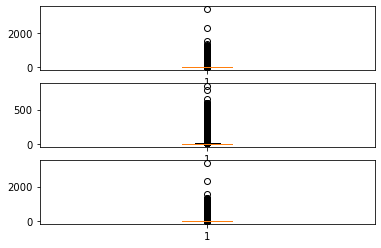

In [14]:
# Outlier analysis for each column

fig=plt.figure()
box_cols = ['Step Duration (sec)', 'Correct Step Duration (sec)','Error Step Duration (sec)']
for i, col in enumerate(box_cols):
    ax=fig.add_subplot(3, 1, i+1)
    ax.boxplot(df_step_clear[df_step_clear[col].notnull()][col].tolist())
fig.show("svg")

In [15]:
# The distribution of continuous values
def show_value_counts_histogram(colname, sort = True):
    # create the bins
    start = int(df_step_clear[colname].min()/10)*10
    end = int(df_step_clear[colname].quantile(q=0.95)/10+1)*10
    step = int((end - start)/20)
    print(start, end, step)
    counts, bins = np.histogram(df_step_clear[colname],bins=range(start, end, step))
    bins = 0.5 * (bins[:-1] + bins[1:])

    fig = px.bar(x=bins, y=counts, labels={'x': colname, 'y':'count'})
    fig.show("svg")


# Box distribution of continuous values
def show_value_counts_box(colname, sort = True):
#     fig = px.box(df_step_clear, y=colname)
#     fig.show("svg")
    plt.figure(figsize=(10,5))
    plt.title('Box-plot for '+ colname,fontsize=20)#标题，并设定字号大小
    plt.boxplot([df_step_clear[colname].tolist()])
    plt.show("svg")
    

# Histogram of discrete values
def show_value_counts_bar(colname, sort = True):
    ds = df_step_clear[colname].value_counts().reset_index()
    ds.columns = [
        colname,
        'Count'
    ]
    if sort:
        ds = ds.sort_values(by='Count', ascending=False)
    # histogram
    fig = px.bar(
        ds,
        x = colname,
        y = 'Count',
        title = colname + ' distribution'
    )
    fig.show("svg")
    

# Pie of discrete values
def show_value_counts_pie(colname, sort = True):
    ds = df_step_clear[colname].value_counts().reset_index()
    ds.columns = [
        colname,
        'percent'
    ]
    ds['percent'] /= len(df_step_clear)
    if sort:
        ds = ds.sort_values(by='percent', ascending=False)
    fig = px.pie(
        ds,
        names = colname,
        values = 'percent',
        title = colname+ ' Percentage',
    )
    fig.update_traces(textposition='inside', textinfo='percent+label',showlegend=False)
    fig.show("svg")

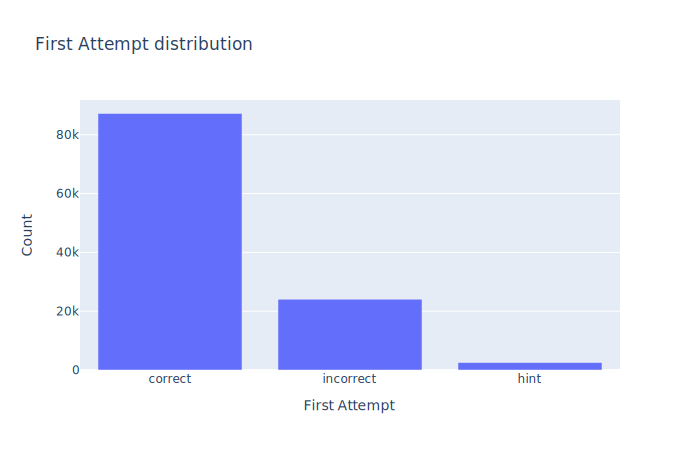

0 70 3


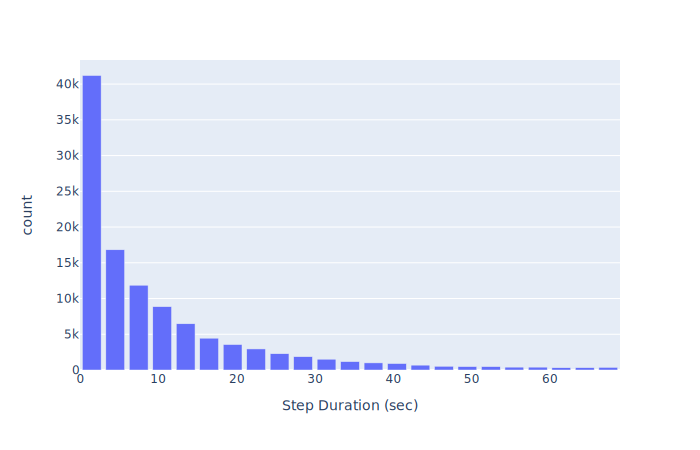

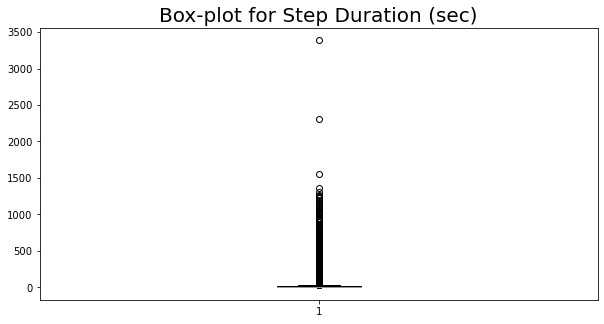

In [16]:
# Bar
show_value_counts_bar('First Attempt')
show_value_counts_histogram('Step Duration (sec)')
show_value_counts_box('Step Duration (sec)')

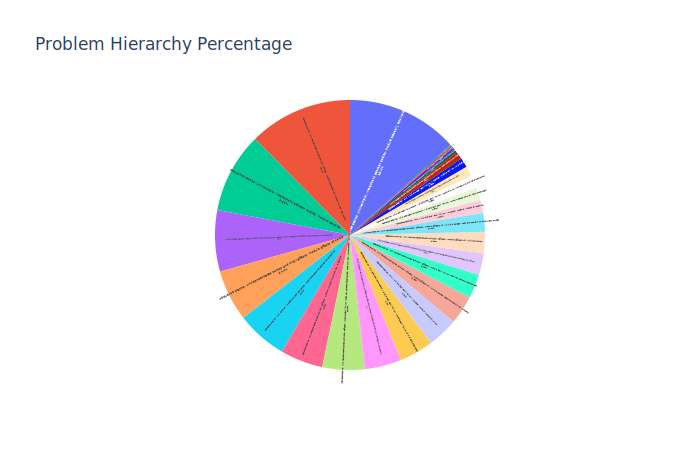

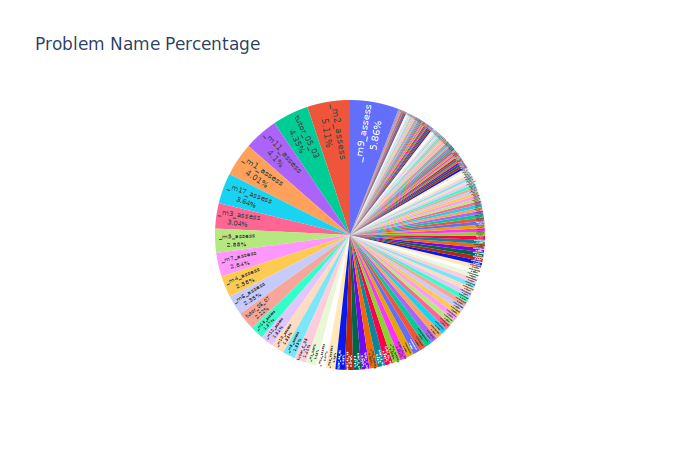

In [17]:
# Pie
# show_value_counts_pie('KC (F2011)')
show_value_counts_pie('Problem Hierarchy')
show_value_counts_pie('Problem Name')
# show_value_counts_pie('Step Name')

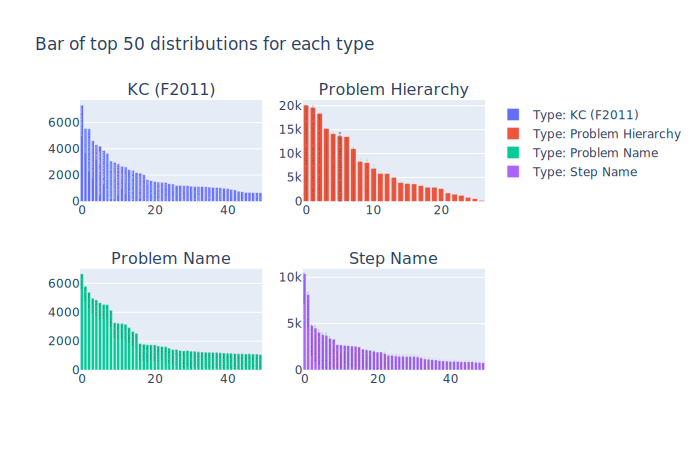

In [19]:
# four column labels are individually distributed as follows 

topnum_max = 50 # show top 50 for each type
fig = make_subplots(rows=2, cols=2,   # 2*2
      start_cell="top-left",  
      subplot_titles=('KC (F2011)','Problem Hierarchy','Problem Name','Step Name'),   
      column_widths=[0.5, 0.5]) 
traces = [
    go.Bar(
        x = df_step[colname].value_counts().reset_index().index.tolist()[:topnum_max],
        y = df_step[colname].value_counts().reset_index()[colname].tolist()[:topnum_max],
        name = 'Type: ' + str(colname),
        text = df_step[colname].value_counts().reset_index()['index'].tolist()[:topnum_max], 
        textposition = 'auto',
    ) for colname in ['KC (F2011)','Problem Hierarchy','Problem Name','Step Name']
]
for i in range(len(traces)):
    fig.append_trace(
        traces[i],
        (i //2) + 1, # pos_row
        (i % 2) + 1  # pos_col
    )
    
fig.update_layout(
    title_text = 'Bar of top 50 distributions for each type ',
)

fig.show("svg")
